In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [8]:
df[df.duplicated()]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal


In [9]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


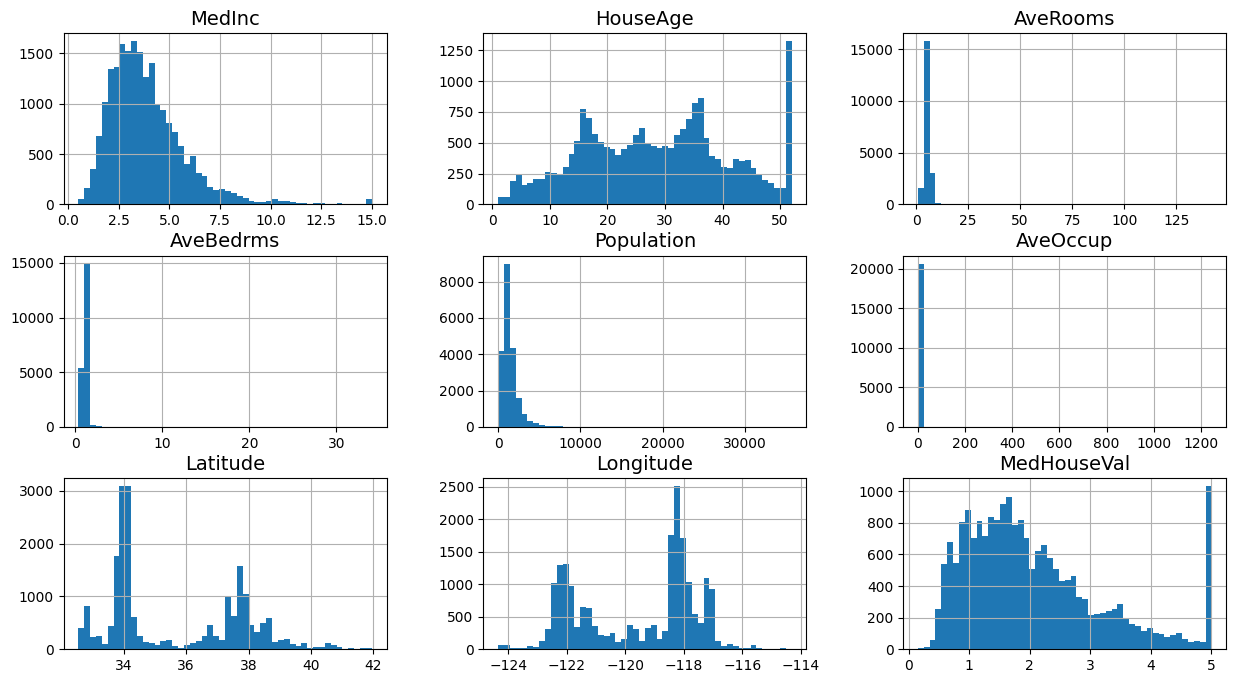

In [11]:
df.hist(bins=50, figsize=(15, 8))
plt.show()

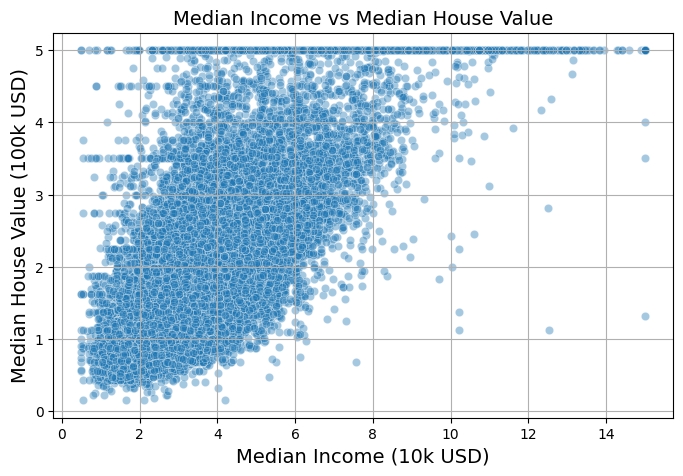

In [14]:
# Como o valor médio do salário afeta o preço da casa?
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='MedInc', y='MedHouseVal', alpha=0.4)
plt.title("Median Income vs Median House Value")
plt.xlabel("Median Income (10k USD)")
plt.ylabel("Median House Value (100k USD)")
plt.grid(True)
plt.show()


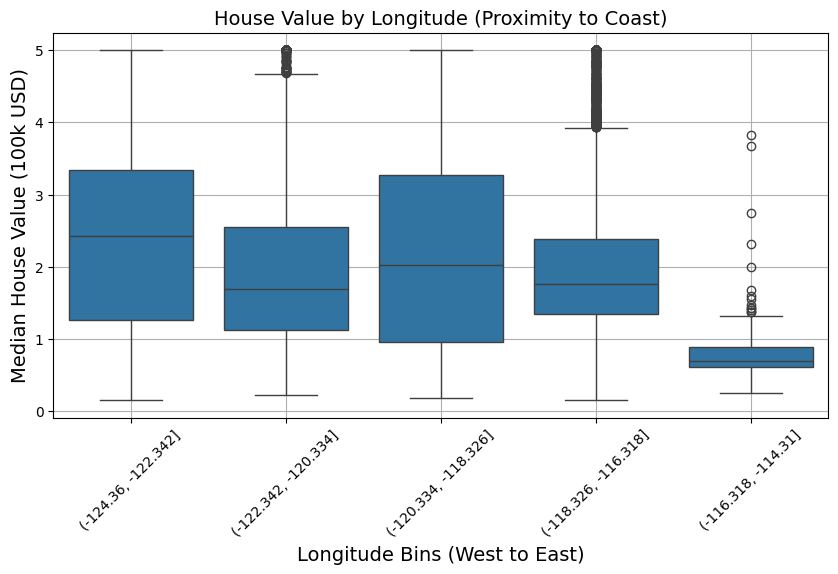

In [21]:
# Como o valor das casas variam com a proximidade com o oceano? (West Coast = closer to ocean)
df['Longitude_bin'] = pd.cut(df['Longitude'], bins=5)

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Longitude_bin', y='MedHouseVal')
plt.title("House Value by Longitude (Proximity to Coast)")
plt.xlabel("Longitude Bins (West to East)")
plt.ylabel("Median House Value (100k USD)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

df = df.drop('Longitude_bin', axis=1)


<Axes: >

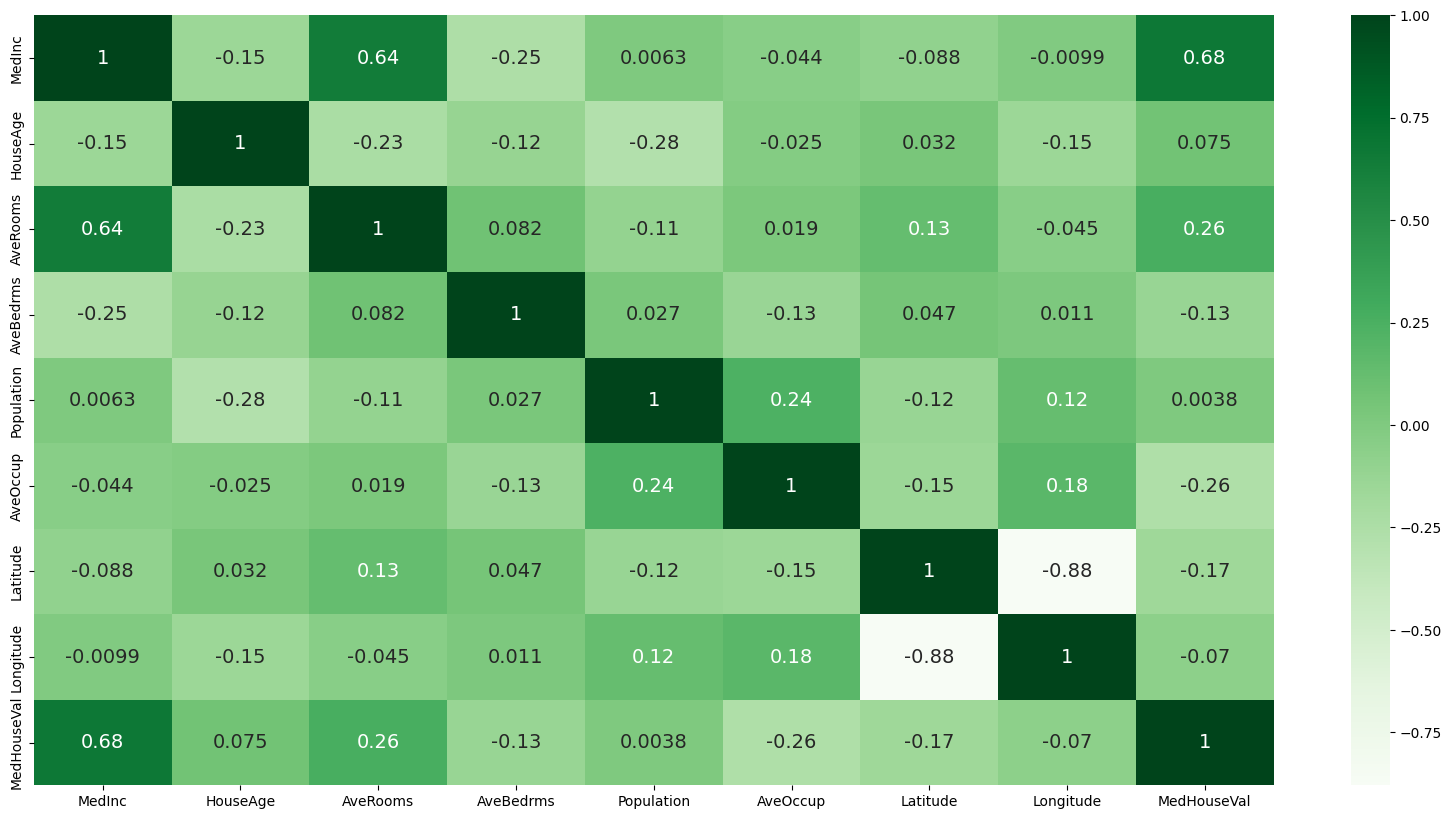

In [26]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(method='spearman'), cmap='Greens', annot=True)

In [31]:
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Seleção de características
#X = X[['MedInc']]

# Extração de características

# Tratamento de dados detalhado

# Separação de treino e teste (e validação se necessário)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Algum tipo de pré-processamento: tratar dados categóricos, normalização, padronização, etc
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [35]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name}")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("R² Score:", r2_score(y_true, y_pred))

# --- 1. Linear Regression ---
lr = LinearRegression()
lr.fit(pd.DataFrame(X_train_scaled, columns=X.columns), y_train)
y_pred_lr = lr.predict(X_test_scaled)
evaluate_model("Linear Regression", y_test, y_pred_lr)

# --- 2. KNN Regression ---
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
evaluate_model("KNN Regression", y_test, y_pred_knn)

# --- 3. Decision Tree Regression ---
tree = DecisionTreeRegressor(max_depth=6, random_state=42)
tree.fit(X_train_scaled, y_train)
y_pred_tree = tree.predict(X_test_scaled)
evaluate_model("Decision Tree Regression", y_test, y_pred_tree)

# --- 4. Neural Network (PyTorch) ---
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(8, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.fc(x)

model = Net()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=64, shuffle=True)
for epoch in range(100):
    for xb, yb in train_loader:
        pred = model(xb)
        loss = criterion(pred, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

with torch.no_grad():
    y_pred_nn = model(X_test_tensor).squeeze().numpy()
evaluate_model("Neural Network (PyTorch)", y_test, y_pred_nn)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(



Linear Regression
MAE: 0.5332001304956565
MSE: 0.5558915986952442
R² Score: 0.575787706032451

KNN Regression
MAE: 0.4461535271317829
MSE: 0.4324216146043236
R² Score: 0.6700101862970989

Decision Tree Regression
MAE: 0.5008044131156354
MSE: 0.4972838079675652
R² Score: 0.6205125146233951

Neural Network (PyTorch)
MAE: 0.3388407655693787
MSE: 0.26609166284096686
R² Score: 0.7969399880042262


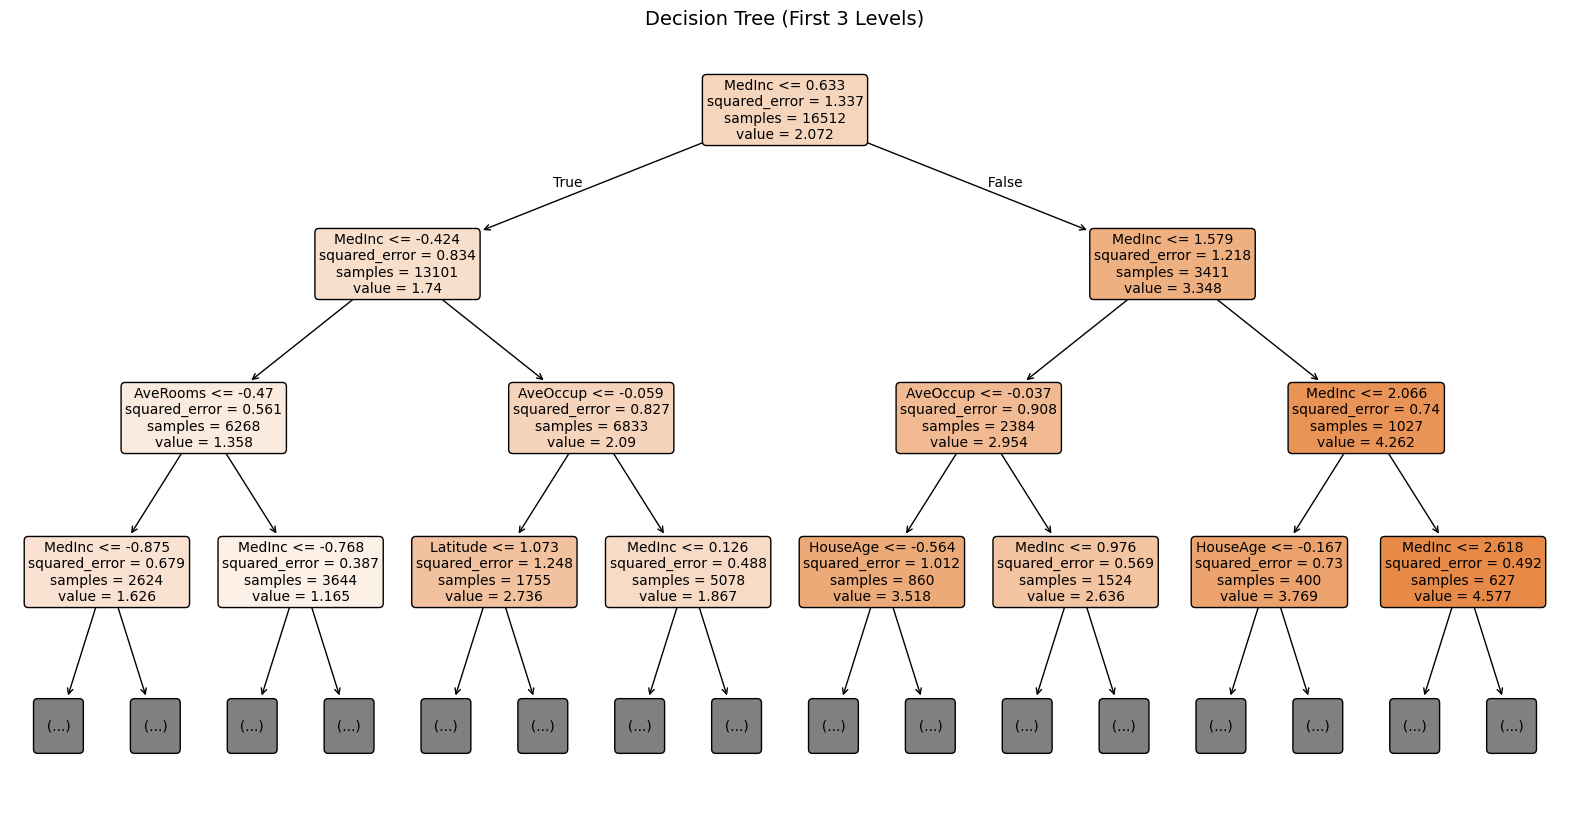

In [41]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=X.columns, filled=True, rounded=True, max_depth=3, fontsize=10)
plt.title("Decision Tree (First 3 Levels)")
plt.show()

ExactExplainer explainer: 4129it [00:21, 88.71it/s]                           



SHAP Summary for Linear Regression:


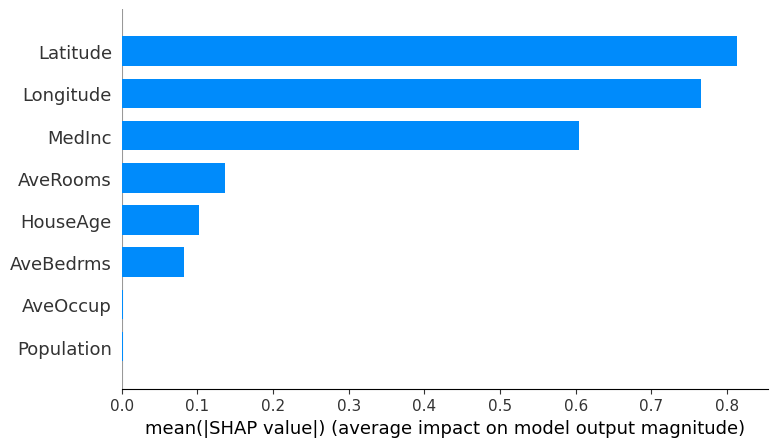


SHAP Summary for Decision Tree:


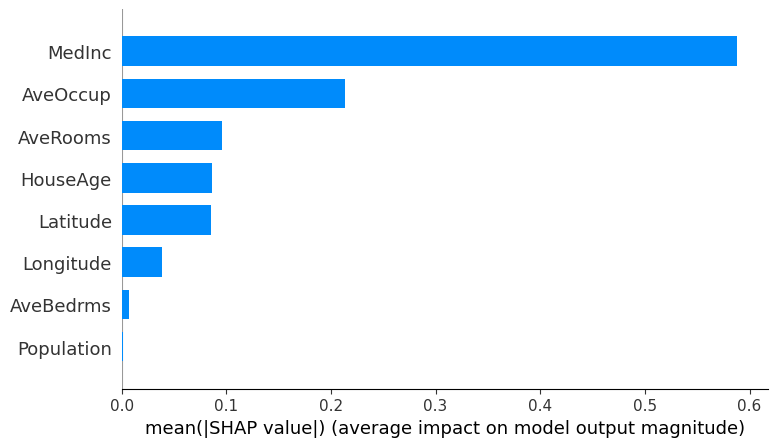

In [36]:
import shap

X_test_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# 1. Linear Regression SHAP
explainer_lr = shap.Explainer(lr.predict, X_test_df)
shap_values_lr = explainer_lr(X_test_df)

print("\nSHAP Summary for Linear Regression:")
shap.summary_plot(shap_values_lr, X_test_df, plot_type="bar")

# 2. Decision Tree SHAP
explainer_tree = shap.Explainer(tree, X_test_df)
shap_values_tree = explainer_tree(X_test_df)

print("\nSHAP Summary for Decision Tree:")
shap.summary_plot(shap_values_tree, X_test_df, plot_type="bar")


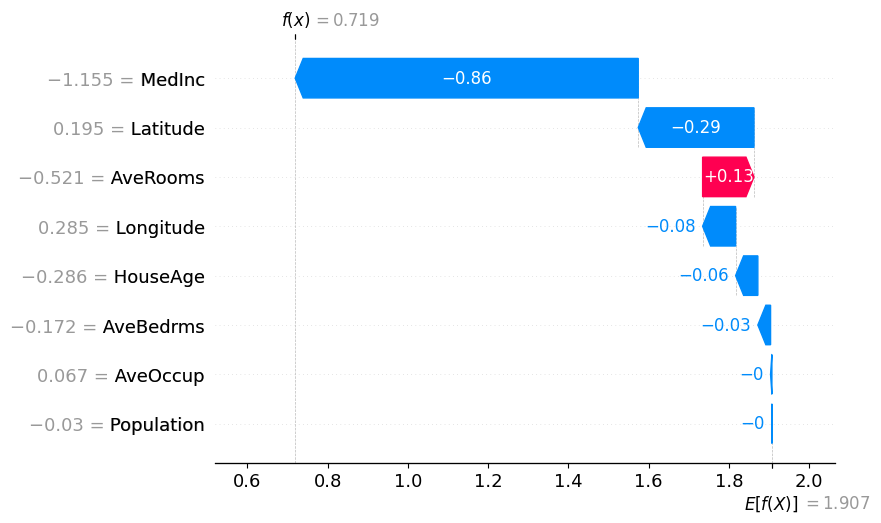

In [40]:
idx = 0
single_example = X_test_df.iloc[[idx]]

shap_value_single = explainer_lr(single_example)
shap.plots.waterfall(shap_value_single[0])